# Spatial Joins

This time, we'll do a join based on location.  

Import pandas, geopandas, matplotlib.pyplot, and os.  

    >>> import pandas as pd
    >>> import geopandas as gpd
    >>> import matplotlib.pyplot as plt
    >>> import os

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os

##### Important: set your working directory to your home folder, and only do this once.
    >>> os.chdir('../')
    >>> os.getcwd()

In [2]:
os.chdir('../')
os.getcwd()

'/home/jupyter-phwh9568'

#### Import and plot the Flood2013Extents shapefile:
    >>> floods = gpd.read_file('workshopdata/Flood2013Extents.shp')
    >>> floods

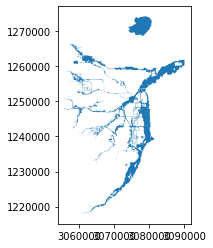

In [3]:
floods = gpd.read_file('workshopdata/Flood2013Extents.shp')
floods.plot()

#### Now we will import the City of Boulder's building footprints layer...
##### But we will do this directly from their geoportal!
    >>> buildings = gpd.read_file('https://opendata.arcgis.com/datasets/0d43652d038a4a0dbca68f0501151bb0_0.geojson')

In [4]:
buildings = gpd.read_file('https://opendata.arcgis.com/datasets/0d43652d038a4a0dbca68f0501151bb0_0.geojson')

#### Plot the buildings layer:
    >>> buildings.plot(figsize=(12,12))

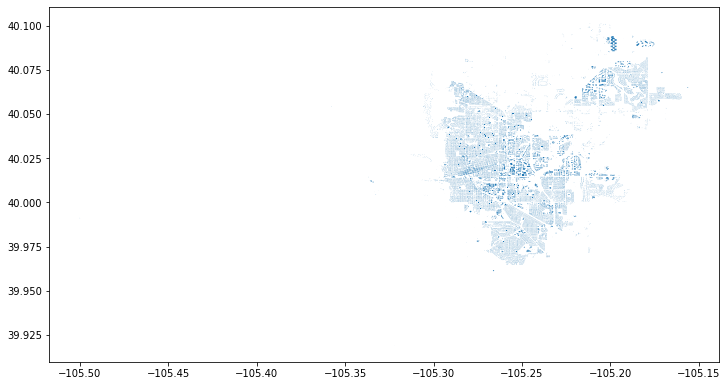

In [5]:
buildings.plot(figsize=(12,12))

#### That's a lot of buildings! Count them up using len()
    >>> len(buildings)

In [6]:
len(buildings)

45728

#### Let's determine how many buildings were within the extent of the flood. We'll use the sjoin function:
    >>> flooded_buildings = gpd.sjoin(buildings, floods)

In [7]:
flooded_buildings = gpd.sjoin(buildings, floods)

/opt/tljh/user/lib/python3.6/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4326'} != {'init': 'epsg:2876'})
  "(%s != %s)" % (left_df.crs, right_df.crs)


#### Uh oh! Wrong you can't do a spatial join if they're not in the same coordinate system! Check crs':
    >>> print(buildings.crs)
    >>> print(floods.crs)

In [8]:
print(buildings.crs)
print(floods.crs)

{'init': 'epsg:4326'}
{'init': 'epsg:2876'}


#### Change the buildings crs to the floods crs:
    >>> buildings = buildings.to_crs(floods.crs)
    >>> buildings.crs

In [9]:
buildings = buildings.to_crs(floods.crs)
buildings.crs

{'init': 'epsg:2876'}

#### Now run the sjoin:
    >>> flooded_buildings = gpd.sjoin(buildings, floods)

In [10]:
flooded_buildings = gpd.sjoin(buildings, floods)

#### Count up the number of flooded buildings:
    >>> len(flooded_buildings)

In [11]:
len(flooded_buildings)

2704

#### Now plot the flooded buildings on top of the flood extents:
    >>> ax = floods.plot(alpha=0.5, figsize=(15,15))
    >>> flooded_buildings.plot(ax=ax, color='green', edgecolor='green')

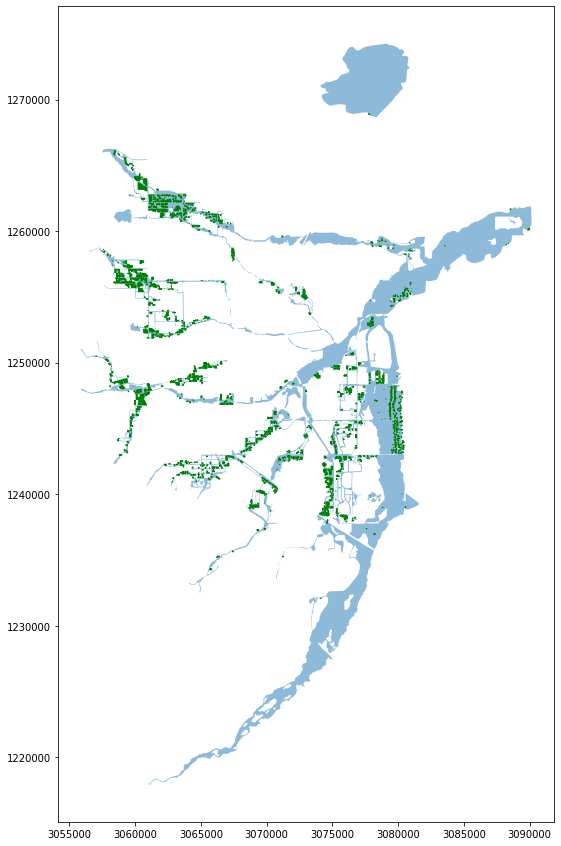

In [12]:
ax = floods.plot(alpha=0.5, figsize=(15,15))
flooded_buildings.plot(ax=ax, color='green', edgecolor='green')

#### Very cool.